In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
y = y.reshape(len(y),1)


In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [7]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

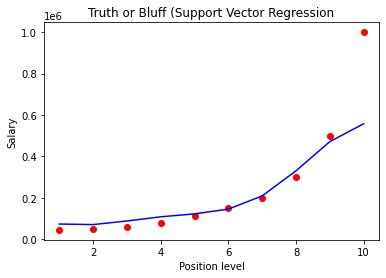

In [8]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title("Truth or Bluff (Support Vector Regression")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


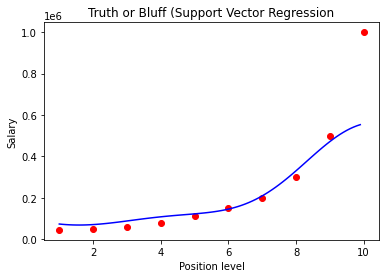

In [11]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='blue')
plt.title("Truth or Bluff (Support Vector Regression")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
